<a href="https://colab.research.google.com/github/Luiz-nyan/git-repository-test/blob/main/5%C2%BA_Desafio_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')


df=pd.read_csv('/content/gdrive/MyDrive/FAPEMA - Ciência de Dados/C Planilha do desafio 5 - Ciência de dados - Relatório do Banco x.csv', sep=',')

print(df)

Mounted at /content/gdrive
       Id  Pontos Estado     Genero  Idade  Bens  Saldo na Conta  Produto  \
0       1     619     BA   Feminino     42     2               0        1   
1       2     608     CE   Feminino     41     1         8380786        1   
2       3     502     BA   Feminino     42     8         1596608        3   
3       4     699     BA   Feminino     39     1               0        2   
4       5     850     CE   Feminino     43     2        12551082        1   
..    ...     ...    ...        ...    ...   ...             ...      ...   
994   996     838     CE  Masculino     43     9        12310588        2   
995   997     610     CE  Masculino     29     9               0        3   
996   998     811     CE  Masculino     44     3               0        2   
997   999     587     CE  Masculino     62     7        12128627        1   
998  1000     811     CE   Feminino     28     4        16773882        2   

     Possui cartao  Ativo     Salario  Saiu  
0 

In [3]:
# Transforma coluna em maiusculo
df.columns = df.columns.str.upper()

print(df.columns.str.upper())

Index(['ID', 'PONTOS', 'ESTADO', 'GENERO', 'IDADE', 'BENS', 'SALDO NA CONTA',
       'PRODUTO', 'POSSUI CARTAO', 'ATIVO', 'SALARIO', 'SAIU'],
      dtype='object')


In [4]:
# Inclui dados restantes da coluna GENERO
mode_genero = df['GENERO'].mode()[0]
df['GENERO'].fillna(mode_genero, inplace=True)

print(df['GENERO'].isna().sum())

0


In [5]:
# Corrigir os dados categóricos, por exemplo, "Mas" para "Masculino" e "Fem" para "Feminino" para adequá-los ao padrão dos demais;
# Dicionário de substituição
replace_dict = {
    'M': 'Masculino',
    'Masc': 'Masculino',
    'F': 'Feminino',
    'Fem': 'Feminino',
    'Feminino': 'Feminino'
}

# Substituindo valores usando o dicionário
df['GENERO'] = df['GENERO'].replace(replace_dict)

print(df['GENERO'].unique())


['Feminino' 'Masculino']


In [6]:
# Exibir as linhas duplicadas
duplicated_rows = df[df.duplicated()]
print("Linhas duplicadas:")
print(duplicated_rows)

Linhas duplicadas:
    ID  PONTOS ESTADO    GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
81  81     665     MA  Feminino     34     1         9664554        2   

    POSSUI CARTAO  ATIVO     SALARIO  SAIU  
81              0      0  17141366.0     0  


In [7]:
# Eliminar dados duplicados
df = df.drop_duplicates()

print(df[df.duplicated()])

Empty DataFrame
Columns: [ID, PONTOS, ESTADO, GENERO, IDADE, BENS, SALDO NA CONTA, PRODUTO, POSSUI CARTAO, ATIVO, SALARIO, SAIU]
Index: []


In [20]:
# Substituir os NANs por valores adequados;

# NANs de todo o DataFrame:
print(df.isna().sum())

# Localização dos NANs
nan_locations = df.isnull().stack()
nan_locations = nan_locations[nan_locations]

print(nan_locations)

# Correção dos NANs da coluna SALARIO pela mediana
df['SALARIO'].fillna(df['SALARIO'].median(), inplace=True)

ID                0
PONTOS            0
ESTADO            0
GENERO            0
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           0
SAIU              0
dtype: int64
Series([], dtype: bool)


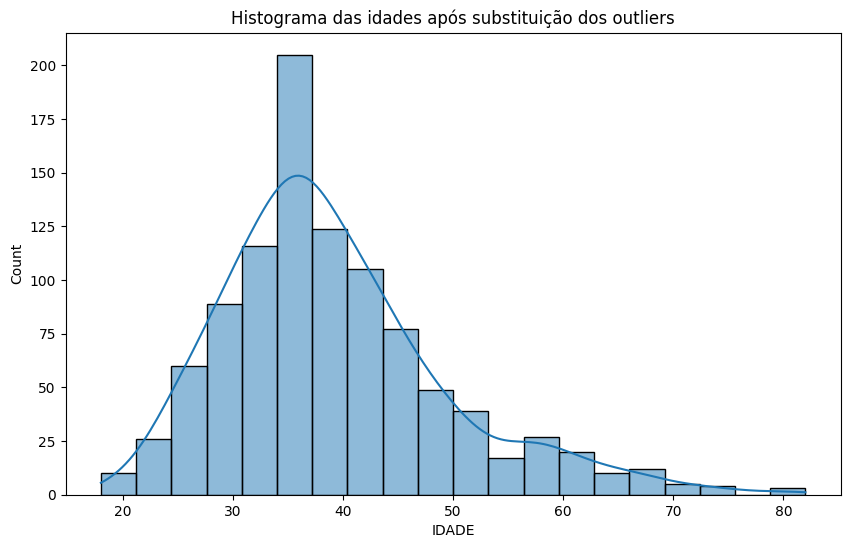

In [29]:
# Eliminar os outliers, atribuindo no lugar deles os valores adequados;

# Definindo o intervalo válido para as idades
idade_min = 1
idade_max = 120

# Calcular a média das idades válidas
media_idade = df.loc[(df['IDADE'] >= idade_min) & (df['IDADE'] <= idade_max), 'IDADE'].mean()

# Substituir os outliers pela média calculada
df['IDADE'] = df['IDADE'].apply(lambda x: media_idade if (x < idade_min or x > idade_max) else x)

# Verificar a mudança no histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['IDADE'], bins=20, kde=True)
plt.title('Histograma das idades após substituição dos outliers')
plt.show()